# Posting in Hacker News: Posting Time Affects the Number of Comments (Analysis with Basic Python)
Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

In this project, I aim to use **basic Python** to compare two types of posts, titles begin with either Ask HN or Show HN, to determine the following:

* Do Ask HN or Show HN receive more comments on average?
* Do posts created at a certain time receive more comments on average?

### Summary of Results

The data shows that the Ask HN posts received more comments than the Show HN posts on average, indicating that Ask HN posts are more likely to receive comments. For Ask HN posts, creating a post at 15:00 Eastern Time in the US (which corresponds to UK time 20:00), has a higher chance of receiving comments.

## Read the data

The data used for the analysis was accessed via https://www.kaggle.com/datasets/hacker-news/hacker-news-posts

In [16]:
# import relavant modules
import csv
import chardet
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
# Read in the data
# identify the encoding first
with open('hacker_news.csv','rb') as file:
    hn_bytes=file.read(1000)
    encoding=chardet.detect(hn_bytes)['encoding']
    print(f"Detected encoding: {encoding}\n")
    
# Read the data with identified encoding
with open('hacker_news.csv','r', encoding=encoding) as file:
    hn=list(csv.reader(file))

# first five rows
print(hn[:5])
    

Detected encoding: utf-8

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']]


## Data cleaning

In [5]:
# Remove header
headers=hn[0]
hn=hn[1:]
print(headers)
print(hn[:5])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16'], ['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94', '1', '0', 'markgainor1', '9/26/2016 3:14']]


## Data extration
Extracting Ask HN and Show HN Posts as we are interested in those posts

In [10]:
# Extract the post with tile (column 2) starting with 'ask hn' or 'show hn'
ask_posts=[]
show_posts=[]
other_posts=[]

for row in hn:
    title=row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))

9139
10158
273822


## Analysis - Average number of comments for Ask HN and Show HN Posts

In [7]:
# Calculate the Average Number of Comments for Ask HN posts 
total_ask_comments=0
for post in ask_posts:
    num_comments=int(post[4])
    total_ask_comments+=num_comments
avg_ask_comments=total_ask_comments/len(ask_posts)
print(f'ask posts average comments number:{avg_ask_comments}')

# Calculate the Average Number of Comments for Show HN posts 
total_show_comments=0
for post in show_posts:
    num_comments=int(post[4])
    total_show_comments+=num_comments
avg_show_comments=total_show_comments/len(show_posts)
print(f'show posts average comments number:{avg_show_comments}')

ask posts average comments number:10.393478498741656
show posts average comments number:4.886099625910612


The ask posts received more comments than the shows posts on average, indicating that ask posts are more likely to receive comments

## Analysis- Finding the amount of Ask Posts and comments by hour created

In [12]:
# Check the data and date format
print(ask_posts[:10])
print(ask_posts[-10:])

[['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53'], ['12578522', 'Ask HN: How do you pass on your work when you die?', '', '6', '3', 'PascLeRasc', '9/26/2016 1:17'], ['12577908', 'Ask HN: How a DNS problem can be limited to a geographic region?', '', '1', '0', 'kuon', '9/25/2016 22:57'], ['12577870', 'Ask HN: Why join a fund when you can be an angel?', '', '1', '3', 'anthony_james', '9/25/2016 22:48'], ['12577647', 'Ask HN: Someone uses stock trading as passive income?', '', '5', '2', '00taffe', '9/25/2016 21:50'], ['12576946', 'Ask HN: How hard would it be to make a cheap, hackable phone?', '', '2', '1', 'hkt', '9/25/2016 19:30'], ['12576899', 'Ask HN: What is that one deciding factor that makes a website successful?', '', '22', '22', 'ziggystardust', '9/25/2016 19:22'], ['12576398', 'Ask HN: Is the world really short of software developers?', '', '2', '3', 'chirau', '9/25/2016 17:55'], ['12575803', 'Ask HN: Geolocalized publ

In [11]:
# Calculate the amount of ask posts created in each hour of the day, along with the number of comments received.
# Save the frequency table as libraries - one with hours as keys and the amount of ask posts as values, another with hours as keys and the the number of comments received as values
counts_by_hour={}
comments_by_hour={}
# Extract the hour from the date;
# Use the datetime.strptime() method to parse the date and create a datetime object
# Then use the datetime.strftime() method to select just the hour from the datetime object
for post in ask_posts:
    date=dt.datetime.strptime(post[6],'%m/%d/%Y %H:%M') # Check the data for the date format
    hour=dt.datetime.strftime(date,'%H')
    if hour in counts_by_hour:
        counts_by_hour[hour]+=1
        comments_by_hour[hour]+=int(post[4])
    else:
        counts_by_hour[hour]=1
        comments_by_hour[hour]=int(post[4])
    
print(counts_by_hour)  
print(comments_by_hour)

{'02': 269, '01': 282, '22': 383, '21': 518, '19': 552, '17': 587, '15': 646, '14': 513, '13': 444, '11': 312, '10': 282, '09': 222, '07': 226, '03': 271, '23': 343, '20': 510, '16': 579, '08': 257, '00': 301, '18': 614, '12': 342, '04': 243, '06': 234, '05': 209}
{'02': 2996, '01': 2089, '22': 3372, '21': 4500, '19': 3954, '17': 5547, '15': 18525, '14': 4972, '13': 7245, '11': 2797, '10': 3013, '09': 1477, '07': 1585, '03': 2154, '23': 2297, '20': 4462, '16': 4466, '08': 2362, '00': 2277, '18': 4877, '12': 4234, '04': 2360, '06': 1587, '05': 1838}


In [14]:
# Calculate the average comments per post by hour
avg_by_hour = []
for hour in counts_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour]/counts_by_hour[hour]])
avg_by_hour

[['02', 11.137546468401487],
 ['01', 7.407801418439717],
 ['22', 8.804177545691905],
 ['21', 8.687258687258687],
 ['19', 7.163043478260869],
 ['17', 9.449744463373083],
 ['15', 28.676470588235293],
 ['14', 9.692007797270955],
 ['13', 16.31756756756757],
 ['11', 8.96474358974359],
 ['10', 10.684397163120567],
 ['09', 6.653153153153153],
 ['07', 7.013274336283186],
 ['03', 7.948339483394834],
 ['23', 6.696793002915452],
 ['20', 8.749019607843136],
 ['16', 7.713298791018998],
 ['08', 9.190661478599221],
 ['00', 7.5647840531561465],
 ['18', 7.94299674267101],
 ['12', 12.380116959064328],
 ['04', 9.7119341563786],
 ['06', 6.782051282051282],
 ['05', 8.794258373205741]]

Top 5 Hours for Ask Posts Comments
15:00: 28.68 average comments per post
13:00: 16.32 average comments per post
12:00: 12.38 average comments per post
02:00: 11.14 average comments per post
10:00: 10.68 average comments per post


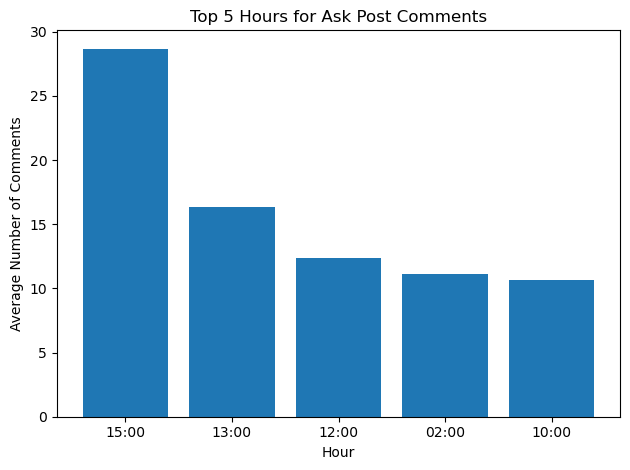

In [27]:
# Sorting the result
avg_by_hour=sorted(avg_by_hour,key=lambda x:[x[1],x[0]], reverse=True)

print(f'Top 5 Hours for Ask Posts Comments')
hours=[]
average_comments=[]
for hour,avg_comment in avg_by_hour[:5]:
    time=dt.datetime.strptime(hour,'%H')
    time_format=dt.datetime.strftime(time,'%H:%M')
    print(f'{time_format}: {avg_comment:.2f} average comments per post')
    hours.append(time_format)
    average_comments.append(avg_comment)
    
    
# Show the results with a bar chart
%matplotlib inline 
top_5=avg_by_hour[:5]
plt.bar(hours,average_comments)
plt.title('Top 5 Hours for Ask Post Comments')
plt.xlabel('Hour')
plt.ylabel('Average Number of Comments')
plt.tight_layout()
plt.show()


In [ ]:
# 

* Creating a post at 15:00 (Eastern Time in the US) has a higher chance of receiving comments; the next popular hour is 13:00
* This corresponds to UK time 20:00 and 18:00.

# Conculsion
In this work, I analysed the post data on Hacker News with special interest in Ask HN posts and Show HN posts.

The analysis shows that the Ask HN posts received more comments than the Show HN posts on average, indicating that Ask HN posts are more likely to receive comments. For Ask HN posts, creating a post at 15:00 Eastern Time in the US (which corresponds to UK time 20:00), has a higher chance of receiving comments.